<a href="https://colab.research.google.com/github/Ryansyaaw/Machine-Learning_2023/blob/main/kuis%202/kuis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Install Tesseract OCR
!sudo apt install tesseract-ocr-ind

# Install library pytesseract
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [10]:

import cv2
import pytesseract
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

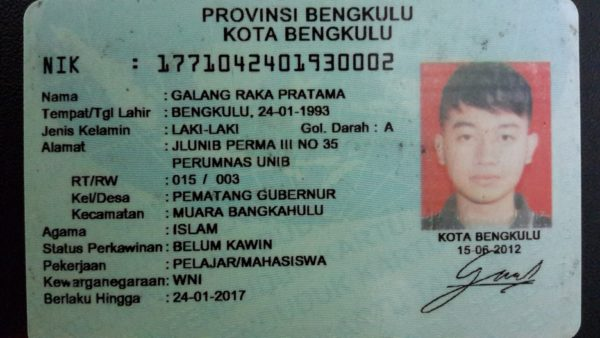

In [11]:
ktp = cv2.imread("/content/drive/MyDrive/Images/ktp/ktp1.png")

cv2_imshow(ktp)
img = cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB)

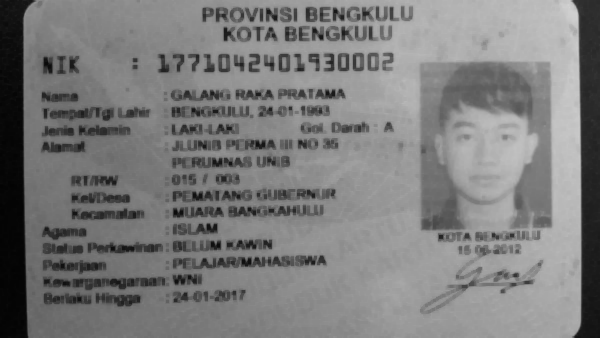

NIK Text: PROVINS! BENGKUL
KOTA BENGKUL
WIK + 4771042401930002
Nara GALANG RAKA PRATAMA ~aesrs
TempaliTgi Lahr BENGKULU, 24.07 1048 v/
Jenia Kelamin = LAKI-LAKI Gol. Darah A
Alama JLUNIB PERMA til NO 35 j
PCRUMNAS UNIS

Rw 015 / 003

KelDesa = PEMATANG GUBCRNUF

Kecamalan — MUARA BANG=AHULL! me ‘
Nema (SLAM
‘Status Perkawinar BL iM #AWIN ee
Senna PELAJARIMAHASISWA az
new mrganeyarna’ WNi Bets
Beriaku Hinge = © 24-01-2017 y



In [12]:
# Pengaburan (Blurring)
blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

# Konversi gambar ke dalam format grayscale
gray_nik = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Praproses morfologi (closing)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morphed_nik = cv2.morphologyEx(gray_nik, cv2.MORPH_CLOSE, kernel)

# Contoh segmentasi teks menggunakan pytesseract
custom_config = r'--oem 3 --psm 6'
nik_text = pytesseract.image_to_string(morphed_nik, config=custom_config)

# Tampilkan hasil pengenalan NIK

cv2_imshow(morphed_nik)

print("NIK Text:", nik_text)

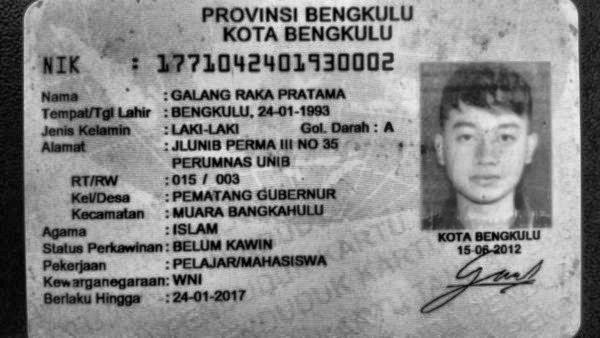

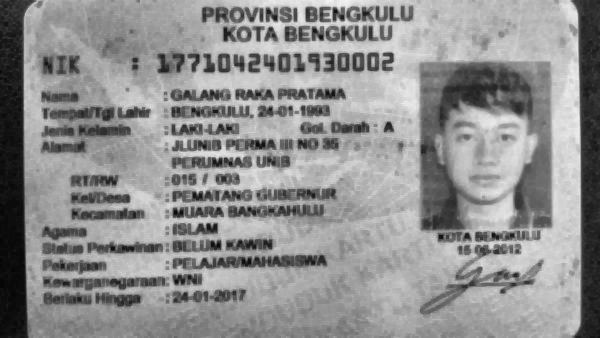

y : PROVINS! BENGKULU
i. KOTA BENGKULU
WIK ¢ 4771042401930002 .
Nome = GALANG RAKA PRATAMA
TempatiTgl Latir - BENGKULU, 24-01-1008
Jenia Kelemin =: LAKI-LAKI Gol. Darah = A -
Alama JLUNIB PL RMA til NO 36 ' Pace
PCRUMNAS UNIB

RTRW 015 / 003

KelDesa —_ PEMATANG GUBERNUR

Kecamalan  MUARA BANGRAHULU é
Statue Perkawinan BLUM RAWIN ae
Bevaky Hinge =: 24-01-2017 a,

i sek Do BY



In [13]:
blurred = cv2.GaussianBlur(ktp,(5,5), 0.5)

# Konversi gambar ke dalam format grayscale
gray_nik = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Contoh praproses: peningkatan kontras
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
preprocessed_nik = clahe.apply(gray_nik)

# # Praproses segmentasi teks menggunakan threshold dinamis
# _, threshold_nik = cv2.threshold(preprocessed_nik, 0, 255, cv2.THRESH_BINARY
#                                  + cv2.THRESH_OTSU)

# Praproses morfologi (closing)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morphed_nik = cv2.morphologyEx(preprocessed_nik, cv2.MORPH_CLOSE, kernel)


# Contoh segmentasi teks menggunakan pytesseract
custom_config = r'--oem 3 --psm 6'
nik_text = pytesseract.image_to_string(morphed_nik, config=custom_config)

# Tampilkan hasil pengenalan NIK
cv2_imshow(preprocessed_nik)
# cv2_imshow(threshold_nik)
cv2_imshow(morphed_nik)
print(nik_text)